In [58]:
import pandas as pd
import seaborn as sns

In [66]:
%matplotlib inline
sns.set_style("white")
sns.set_context("talk")

In [9]:
results = pd.read_csv('../results_all.csv', )
city_df = pd.read_csv('/Users/joe/Dropbox/SFI_Census_Stuff/2010Census/cities.csv')

In [17]:
import re
import unicodedata
def slugify(value):
    """
    From Django source.
    Converts to lowercase, removes non-word characters (alphanumerics and
    underscores) and converts spaces to hyphens. Also strips leading and
    trailing whitespace.
    """
    value = unicodedata.normalize('NFKD', value).encode(
        'ascii', 'ignore').decode('ascii')
    value = re.sub('[^\w\s-]', '', value).strip().lower()
    return re.sub('[-\s]+', '-', value)

In [29]:
results = results.rename(columns={'CITY':'CITY_SLUG'})
city_df['CITY_SLUG'] = city_df['CITY_NAME'].map(slugify)

In [31]:
df = pd.ordered_merge(results, city_df, on='CITY_SLUG', fill_method='ffill')

In [47]:
grouped = df.groupby(['COLUMN'])

# Moran's I Results for US Block Groups

***Note: All MSA & MicroSA. Excludes NYC and LA (for now)***


## Moran's I vs log of Total Households

Plots are of Moran's I measure vs Total Households for:

1. Average Household Income
2. Area of Blockgroup 
3. DKL of Income
3. Density of Bkgp
4. Weight of Household Income < 10,000
5. Weight of Household Income > 200,000
6. Total Households

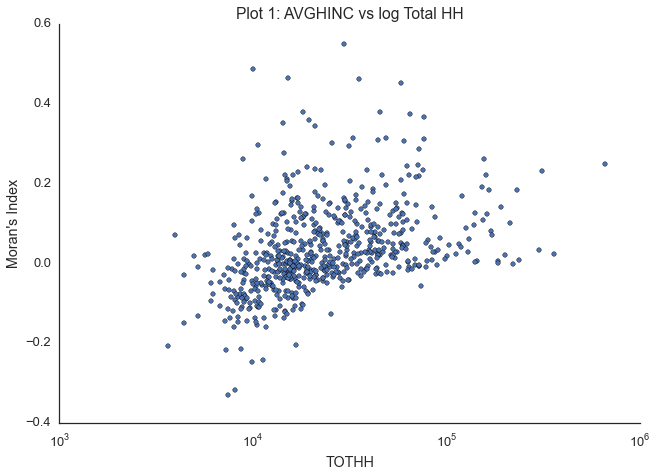

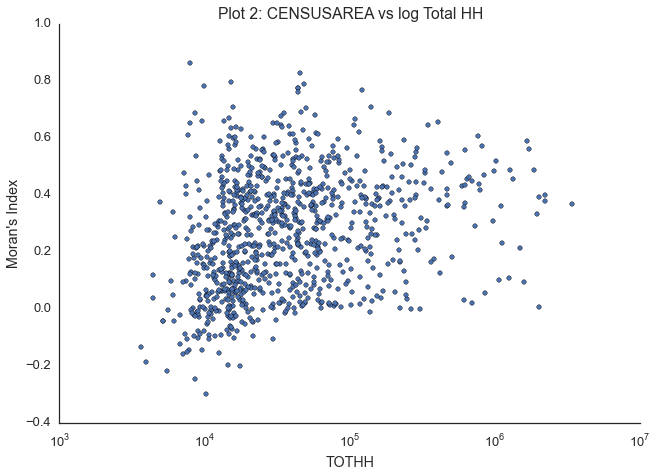

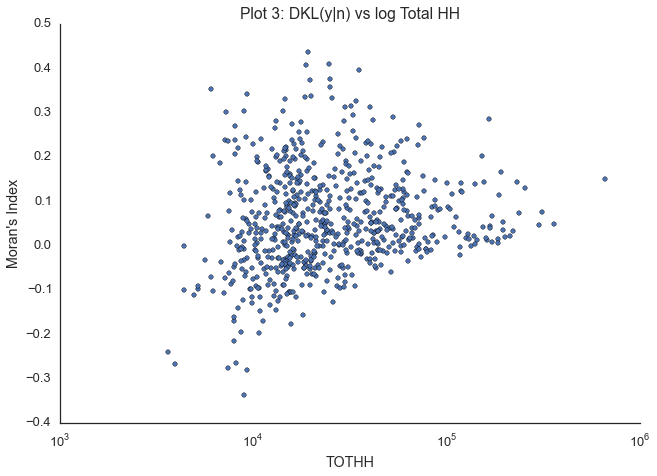

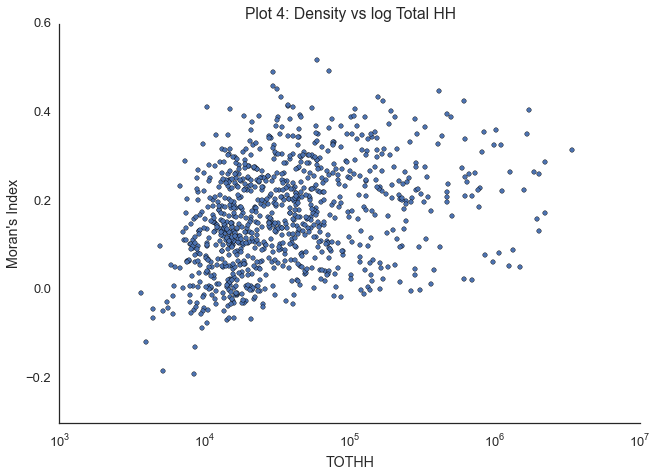

In [ ]:
for i, (name, group) in enumerate(grouped):
    title = 'Plot {}: {} vs {}'.format(i+1, name, 'log Total HH')
    group.plot(x='TOTHH', y="Moran's Index", logx=True, kind='scatter', title=title)
    sns.despine()

## Moran's I vs Mutual Information

Plots are of Moran's I measure vs Mutual Information for:

1. Average Household Income
2. Area of Blockgroup 
3. DKL of Income
3. Density of Bkgp
4. Weight of Household Income < 10,000
5. Weight of Household Income > 200,000
6. Total Households

In [ ]:
for i, (name, group) in enumerate(grouped):
    title = 'Plot {}: {} vs {}'.format(i+1, name, 'Mutual Info')
    group.plot(x='MI', y="Moran's Index", logx=True, kind='scatter', title=title)
    sns.despine()